---
title: Perceptron Algorithm
author: Anweshan Adhikari
date: '2023-03-10'
image: "image.jpg"
description: "A simple implementation of Perceptron Algorithm."
format: html
---

Here is the link to my source code: [Perceptron.py](https://github.com/An65011065/An65011065.github.io/blob/main/posts/Perceptron/) 

# Introduction to Perceptron Algorithm

The perceptron algorithm is a powerful machine learning tool used to classify objects as part of a group. It's application in machine learning algorithm can be extended to real-life scenarios, such as assessing the likelihood of a student's acceptance into Middlebury College based on their academic performance. In this blog post, we will be exploring how this algorithm works and can be implemented on a linearly seperable data.

# Unpacking the Perceptron Algorithm
The perceptron algorithm separates the data points by a hyperplane, which is a decision boundary that separates the data points into two classes. The weight function w is used to determine the position of the hyperplane.

We start with initializing the weights to random values using the np.random.rand() function. We then continue updating the weight vector until all the data points are correctly classified. This is achieved by iteratively selecting a random data point and updating the weight vector until all data points are correctly classified.

In order to classify the data points correctly, the perceptron algorithm iteratively updates the weight vector until all data points are classified correctly. To check whether a data point is misclassified, the algorithm starts by choosing a random data point at i- generated by using np.random.randint(m) and uses the comparator:

                           if (y_tilde[i] * np.dot(X_[i], self.w)) <= 0:

The dot product of X_[i] and self_w is computed, resulting in a weighted sum of the features of X_[i]. The sign of this weighted sum determines the predicted label for X_[i].
If a data point is misclassified, the algorithm updates the weight vector by adding or subtracting a scaled version of the misclassified data point using the equation:

                                 self.w += y_tilde[i] * X_[i]

This aligns the weight vector with the misclassified data point, pushing the hyperplane towards better classification.

The weighted sum is multiplied by the true label (y_tilde), and if the result is 1, the data point is correctly classified. If the result is less than 0, the data point is misclassified, and the weight vector is updated. 

After each iteration of updating our  weight vector, our algorithm computes the accuracy of the current classification of the hyperplane by using the score function and records the accuracy n the history array.

The algorithm continues to update the weight vector until all data points are classified correctly, hence reaching an accuracy of 1, or until the maximum number of iterations is reached.

# Experiment 1:
**Implementing the Perceptron Algorithm on Linearly Separable Data**

In the graphs below, the perceptron algorithm is used to find a line that separates a linearly separable dataset with two features. The algorithm iteratively updates the weight vector until all data points are classified correctly. Running the perceptron.fit function on the dataset results in the weight vector converging to a value that defines this separating line. The resulting graphs will visually demonstrate the success of the algorithm in separating the data points.

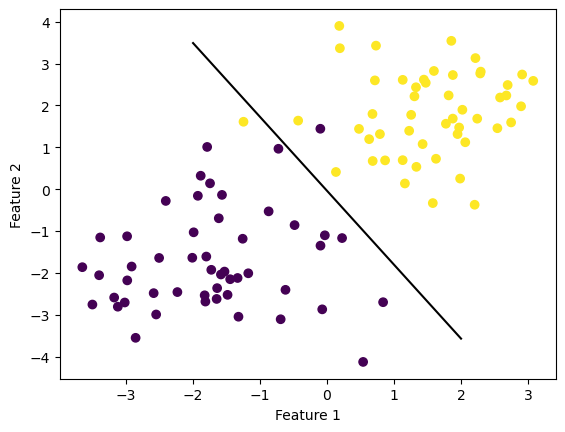

In [99]:

from Perceptron import Perceptron
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

#np.random.seed(12345)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
p = Perceptron()
p.fit(X, y, max_steps = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

The decision boundary is the line which separates two classes of data points. In this case, the Perceptron algorithm has successfully found a line that separates the data points into two distinct classes. Hence the perceptron algorithm is succefull on data with two features.

Also the accuracy of the algorithm was 1.0 and we can look over the final 10 accuracies until the weight vector converged to a value that defines this separating line.

In [98]:
print("The accuracyscore is ", p.score(X,y))
print("The final 10 accuracy scores were: ",p.history[-10:]) 

The accuracyscore is  1.0
The final 10 accuracy scores were:  [0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.0, 1.0]


The graph below plots the accuracy scores from the first iteration until the point of converge:

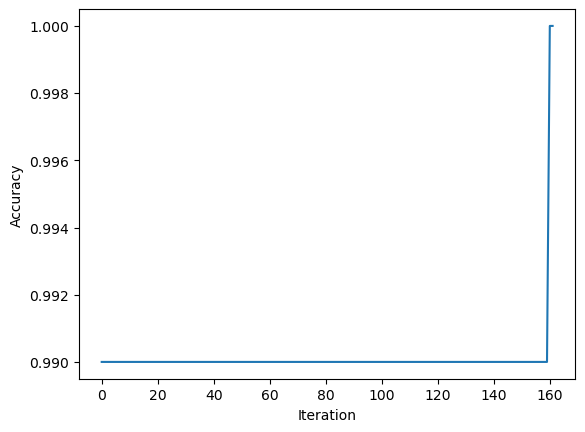

In [35]:
plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

# Experiment 2: 
**Implementing the Perceptron Algorithm on a non-Linearly Separable Data**

Text(0.5, 1.0, "Perceptron classifier's decision boundary on nonlinearly seperable data")

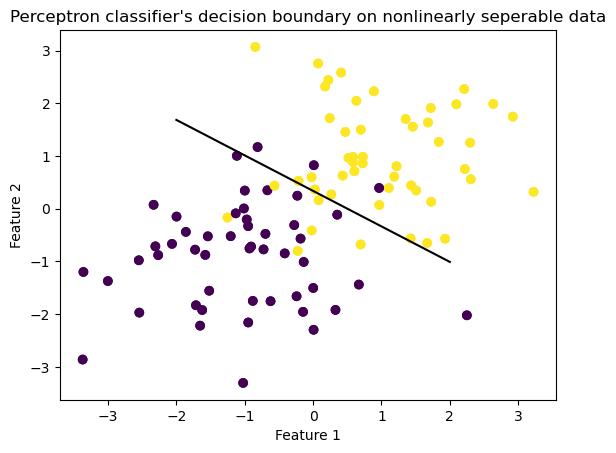

In [73]:
from Perceptron import Perceptron
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.datasets import make_circles

np.random.seed(12345)

n = 100 
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y) 
xlab = plt.xlabel("Feature 1") 
ylab = plt.ylabel("Feature 2")

p = Perceptron()

p.fit(X, y, max_steps = 1000)

def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Perceptron classifier's decision boundary on nonlinearly seperable data")

Based on the plot itself, it is obvious that the the weight vector found by the Perceptron algorithm did not converge to a straight line that can completely separate the two classes. Let’s check the final accuracy and the final 10 accuracy before the p.fit function reached the maximum number of steps.

In [74]:
print("The accuracyscore is ", p.score(X,y))
print("The final 10 accuracy scores were: ",p.history[-10:]) 

The accuracyscore is  0.91
The final 10 accuracy scores were:  [0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91]


Based on the results, it is evident that the p.fitfunction did not terminate due to achieving an accuracy of 1, but rather due to reaching the maximum number of iterations set at 1000. Hence, the perceptron algorithm fails to find a line to separate non-linearly separable data. Furthermore, the graph below- accuracy scores over iterations- shows that the algorithm failed to reach an accuracy score of 1 at any step during the iteration.

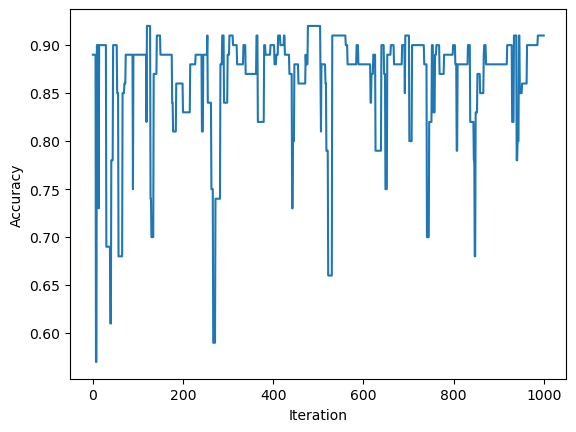

In [75]:
plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

# Time Complexity
The runtime complexity of the algorithm is determined  by the dot product operation in the predict function. This dot product operation requires O(p) time, where p is the number of features in the input vector. This is because the dot product involves summing the product of each element in the input vector with its corresponding weight in the weight vector, and there are p such products to compute. Thus, as the number of features increases, the runtime of this algorithm increases linearly